In [ ]:
#WeatherPY

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
!pip install citipy

# Import API key
from api_keys import api_key

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

In [7]:
# Establish base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?appid="

# Create dataframe to be added to in for loop
weatherDF = pd.DataFrame()
weatherDF["City"] = ""
weatherDF["Cloudiness"] = ""
weatherDF["Country"] = ""
weatherDF["Date"] = "" 
weatherDF["Humidity"] = ""
weatherDF["Lat"] = ""
weatherDF["Lng"] = ""
weatherDF["Max Temp"] = ""
weatherDF["Wind Speed"] = ""

# Print out the beginning of the retrieval notificaiton
print("Beginning Data Retrieval")
print("-------------------------------")

# Loop through all of the cities within the cities array
for x in np.arange(len(cities)):

    # Print processing of the current record along with city
    print(f"Processing record {x} | {cities[x]}")
    
    # Try these things
    try:
        
        # Request the current wheather statistics from built URL of the current city in JSON form
        currentWeather = requests.get(f"{base_url}{api_key}&q={cities[x]}&units=imperial").json()
        
        # Place all of the variables into the created dataframe
        weatherDF.loc[x, "City"] = currentWeather["name"]
        weatherDF.loc[x, "Cloudiness"] = currentWeather["clouds"]["all"]            
        weatherDF.loc[x, "Country"] = currentWeather["sys"]["country"]
        weatherDF.loc[x, "Date"] = currentWeather["dt"]
        weatherDF.loc[x, "Humidity"] = currentWeather["main"]["humidity"]
        weatherDF.loc[x, "Lat"] = currentWeather["coord"]["lat"]
        weatherDF.loc[x, "Lng"] = currentWeather["coord"]["lon"]
        weatherDF.loc[x, "Max Temp"] = currentWeather["main"]["temp_max"]
        weatherDF.loc[x, "Wind Speed"] = currentWeather["wind"]["speed"]
    
    # If previous block did not work display error message
    except (KeyError, IndexError):
        print("City not found. Skipping...")

# Print end of data retrieval process message
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

# Drop the rows that have been added with no data or partial data
cleanWeather = weatherDF.dropna()

Beginning Data Retrieval
-------------------------------
Processing record 0 | bethel
Processing record 1 | taolanaro
City not found. Skipping...
Processing record 2 | labuhan
Processing record 3 | ponta do sol
Processing record 4 | mataura
Processing record 5 | bluff
Processing record 6 | mar del plata
Processing record 7 | bubaque
Processing record 8 | iwanai
Processing record 9 | ushuaia
Processing record 10 | beringovskiy
Processing record 11 | yellowknife
Processing record 12 | richards bay
Processing record 13 | yumen
Processing record 14 | chuy
Processing record 15 | mareeba
Processing record 16 | luderitz
Processing record 17 | bambous virieux
Processing record 18 | lasa
Processing record 19 | qaanaaq
Processing record 20 | luganville
Processing record 21 | hilo
Processing record 22 | palabuhanratu
City not found. Skipping...
Processing record 23 | utiroa
City not found. Skipping...
Processing record 24 | rikitea
Processing record 25 | hermanus
Processing record 26 | dingle
Pro

Processing record 226 | kahului
Processing record 227 | ishinomaki
Processing record 228 | la roda
Processing record 229 | coquimbo
Processing record 230 | kayes
Processing record 231 | ozernovskiy
Processing record 232 | taoudenni
Processing record 233 | tahta
City not found. Skipping...
Processing record 234 | tiksi
Processing record 235 | caxito
Processing record 236 | camocim
Processing record 237 | nikolskoye
Processing record 238 | tessalit
Processing record 239 | krasnyy kut
Processing record 240 | baker city
Processing record 241 | dalbandin
Processing record 242 | neiafu
Processing record 243 | cervo
Processing record 244 | poum
Processing record 245 | sinnamary
Processing record 246 | ancud
Processing record 247 | faanui
Processing record 248 | cape canaveral
Processing record 249 | puri
Processing record 250 | guarapari
Processing record 251 | necochea
Processing record 252 | verkhoyansk
Processing record 253 | ngukurr
City not found. Skipping...
Processing record 254 | hent

Processing record 454 | palu
Processing record 455 | linguere
City not found. Skipping...
Processing record 456 | saint anthony
Processing record 457 | lumberton
Processing record 458 | saint-augustin
Processing record 459 | mlonggo
Processing record 460 | vila velha
Processing record 461 | kulhudhuffushi
Processing record 462 | noshiro
Processing record 463 | jiddah
City not found. Skipping...
Processing record 464 | rehnan
Processing record 465 | rocha
Processing record 466 | klyuchi
Processing record 467 | porbandar
Processing record 468 | kenai
Processing record 469 | ambovombe
Processing record 470 | fort saint john
City not found. Skipping...
Processing record 471 | nylstroom
City not found. Skipping...
Processing record 472 | broken hill
Processing record 473 | kabale
Processing record 474 | savonlinna
Processing record 475 | marsa matruh
Processing record 476 | rungata
City not found. Skipping...
Processing record 477 | skogn
Processing record 478 | san martin de hidalgo
City n

Convert Raw Data to DataFrame.

Export the city data into a .csv.

Display the DataFrame.

In [9]:
# Output to CSV file: 
cleanWeather.to_csv("output_data_file.csv")

# Check the CSV conversion was successful with counts of the columns: 
cleanWeather.count()

City          526
Cloudiness    526
Country       526
Date          526
Humidity      526
Lat           526
Lng           526
Max Temp      526
Wind Speed    526
dtype: int64

Display the Data Frame.

In [10]:
# Display the final dataframe
cleanWeather.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bethel,90,US,1549258500,100,60.79,-161.76,28.04,9.17
2,Labuhan,80,ID,1549260373,84,-2.54,115.51,81.31,3.04
3,Ponta do Sol,36,BR,1549260373,85,-20.63,-46,68.48,3.04
4,Mataura,88,NZ,1549260373,53,-46.19,168.86,71.18,21.83
5,Bluff,92,AU,1549260374,51,-23.58,149.07,85.27,15.01


Latitude vs. Temperature Plot

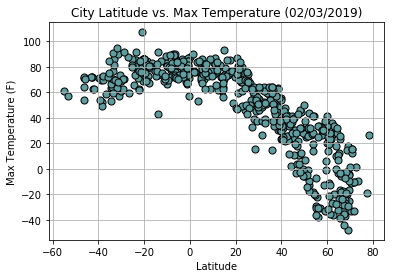

In [16]:
# Plot a scatter plot of latitude vs temperature with formatting
plt.scatter(cleanWeather["Lat"], cleanWeather["Max Temp"], color="cadetblue",
           edgecolors = "k", s = 50)

# Plot title and axis labels as well as the grid
plt.title(f"City Latitude vs. Max Temperature (02/03/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure to the output folder
plt.savefig("latVtemp.png")

Latitude vs. Humidity Plot

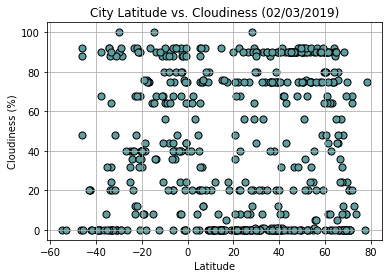

In [17]:
# Plot a scatter plot of latitude vs cloudiness with formatting
plt.scatter(cleanWeather["Lat"], cleanWeather["Cloudiness"],color="cadetblue",
           edgecolors = "k", s = 50)

# Plot title and axis labels as well as the grid
plt.title("City Latitude vs. Cloudiness (02/03/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure to the output folder
plt.savefig("latVcloud.png")

Latitude vs. Wind Speed Plot

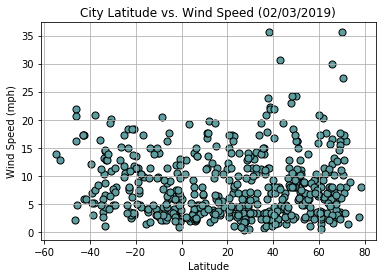

In [18]:
# Plot a scatter plot of latitude vs wind speed with formatting
plt.scatter(cleanWeather["Lat"], cleanWeather["Wind Speed"],color="cadetblue",
           edgecolors = "k", s = 50)

# Plot title and axis labels as well as the grid
plt.title("City Latitude vs. Wind Speed (02/03/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save the figure to the output folder
plt.savefig("latVwind.png")